In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
im3 = threes[0]
im= Image.open(im3)
im.to_thumb(224)

In [8]:
array(im)[4:10,10:16]

array([[  0,  42, 118, 219, 166, 118],
       [103, 242, 254, 254, 254, 254],
       [ 18, 232, 254, 254, 254, 254],
       [  0, 104, 244, 254, 224, 254],
       [  0,   0, 207, 254, 210, 254],
       [  0,   0,  84, 206, 254, 254]], dtype=uint8)

In [9]:
tensor(im)[4:10,10:16]

tensor([[  0,  42, 118, 219, 166, 118],
        [103, 242, 254, 254, 254, 254],
        [ 18, 232, 254, 254, 254, 254],
        [  0, 104, 244, 254, 224, 254],
        [  0,   0, 207, 254, 210, 254],
        [  0,   0,  84, 206, 254, 254]], dtype=torch.uint8)

In [10]:
im3_t = array(im)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0
1,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0
2,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0
3,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0
4,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0
5,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0
6,0,0,0,0,0,0,0,0,0,24,209,254,254,254,171,0,0,0
7,0,0,0,0,0,0,0,0,91,137,253,254,254,254,112,0,0,0
8,0,0,0,0,0,0,40,214,250,254,254,254,254,254,34,0,0,0
9,0,0,0,0,0,0,81,247,254,254,254,254,254,254,146,0,0,0


In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

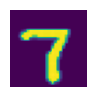

In [116]:
show_image(seven_tensors[0]);

In [13]:

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

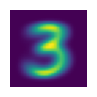

In [14]:
mean_3 = stacked_threes.mean(0)
show_image(mean_3);

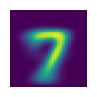

In [15]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

In [16]:
a_3 = stacked_threes[0]
distance_3_abs = (a_3-mean_3).abs().mean()
distance_3_sqr = ((a_3-mean_3)**2).mean().sqrt()
distance_3_abs,distance_3_sqr



(tensor(0.1074), tensor(0.1912))

In [17]:
#a_7 = stacked_sevens[0]
distance_7_abs = (a_3-mean7).abs().mean()
distance_7_sqr = ((a_3-mean7)**2).mean().sqrt()
distance_7_abs, distance_7_sqr


(tensor(0.1441), tensor(0.2780))

In [18]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1441), tensor(0.2780))

In [19]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [20]:
def mnist_func(a,b): return (a-b).abs().mean((-1,-2))
mnist_func(a_3,mean_3)

tensor(0.1074)

In [21]:
valid_3_dist = mnist_func(valid_3_tens,mean_3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1744, 0.1042, 0.1115,  ..., 0.1336, 0.1161, 0.1143]),
 torch.Size([1010]))

In [22]:
def is_3(x): return mnist_func(x,mean_3) < mnist_func(x,mean7)

In [23]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [24]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [25]:
accuracy_3 = is_3(valid_3_tens).float().mean()
accuracy_7 = (1-is_3(valid_7_tens).float()).mean()

accuracy_3, accuracy_7, (accuracy_3+ accuracy_7)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [26]:
def f(x): return x**2

In [27]:
import matplotlib.pyplot as plt

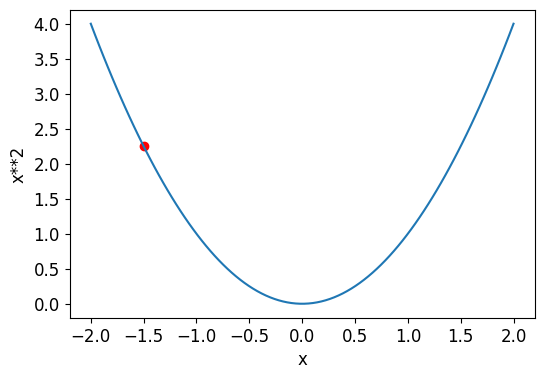

In [28]:
plot_function(f,'x','x**2')
plt.scatter(-1.5,f(-1.5),color='red')

In [29]:
xt = tensor(3.).requires_grad_()

In [30]:
yt = f(xt)

In [31]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [32]:
yt.backward()

In [33]:
xt.grad

tensor(6.)

In [34]:
xt = tensor([3.,4.,10.]).requires_grad_()

In [35]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [36]:
def f(x): return (x**2).sum()

In [37]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [38]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [39]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

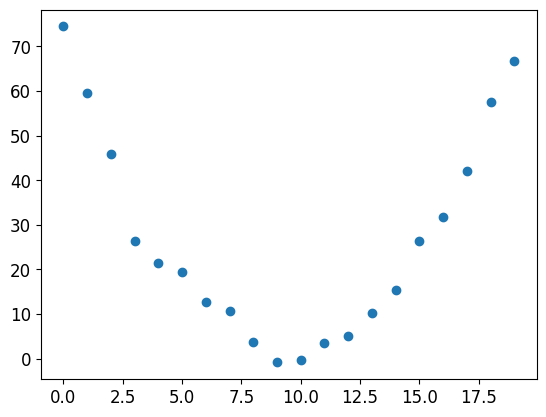

In [40]:
speed = torch.randn(20)*3 + 0.75*(time -9.5)**2 +1
plt.scatter(time,speed)

In [41]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t)+c

In [42]:
def mse(preds,target): return ((preds-target)**2).mean()

In [43]:
params = torch.randn(3).requires_grad_()

In [44]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [45]:
preds = f(time,params)

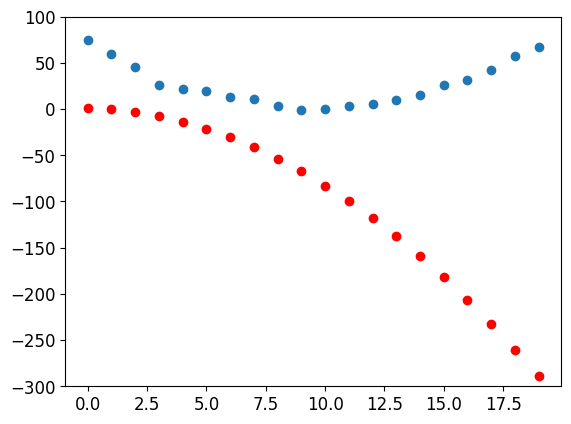

In [46]:
def show_preds(preds,ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time,speed)
  ax.scatter(time,to_np(preds),color='red')
  ax.set_ylim(-300,100)
show_preds(preds)

In [47]:
loss =mse(preds,speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [48]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [49]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [50]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [51]:
lr=1e-5

In [52]:
params.data -= lr * params.grad.data
params.grad=None

In [53]:
preds = f(time,params)
mse(preds,speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

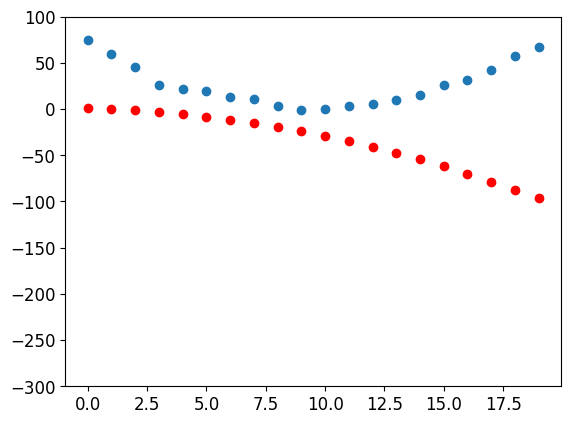

In [54]:
show_preds(preds)

In [55]:
def apply_step(params, prn=True):
  preds = f(time,params)
  loss=mse(preds,speed)
  loss.backward()
  params.data -= lr* params.grad.data
  params.grad=None
  if prn: print(loss.item())
  return preds

In [56]:
for i in range(10):
  apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [57]:
params

tensor([ 0.1756, -0.6896,  1.3589], requires_grad=True)

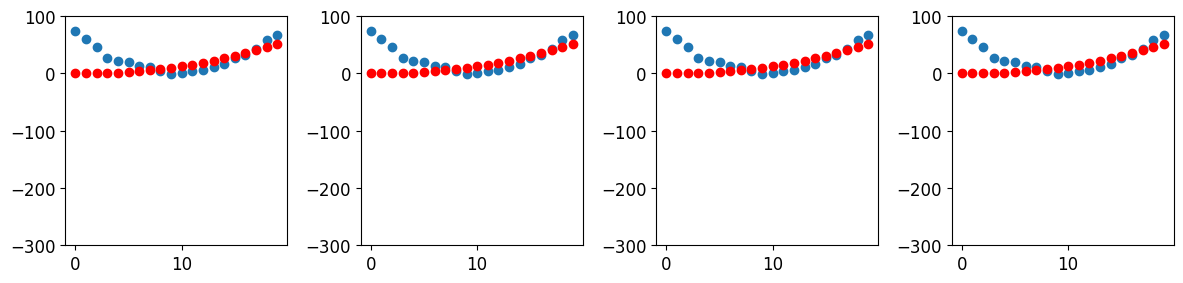

In [58]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params,False),ax)
plt.tight_layout()

In [59]:
train_x = torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)

In [60]:
train_x[1:3,:]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [61]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [62]:
dset = list(zip(train_x,train_y))
x,y = dset[0]



In [63]:
x.shape, y

(torch.Size([784]), tensor([1]))

In [64]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28*28)
valid_y = tensor([1]* len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [65]:
def init_params(size, std=1.0): return (torch.randn(size) * std).requires_grad_()

In [66]:
weights = init_params((28*28,1))
weights

tensor([[ 1.3123e+00],
        [ 6.8716e-01],
        [-1.0892e+00],
        [-3.5529e-01],
        [-9.1382e-01],
        [-6.5814e-01],
        [ 7.8024e-02],
        [ 5.2581e-01],
        [ 1.1790e+00],
        [-4.3445e-01],
        [-1.3864e+00],
        [-1.2862e+00],
        [-1.4032e+00],
        [ 3.6004e-02],
        [-6.3477e-02],
        [ 6.7561e-01],
        [ 3.6725e-01],
        [ 1.7541e-01],
        [ 1.3852e+00],
        [-4.4585e-01],
        [ 1.4451e+00],
        [ 8.5641e-01],
        [ 2.2181e+00],
        [ 5.2317e-01],
        [ 1.1754e+00],
        [ 5.6117e-01],
        [-4.5275e-01],
        [-7.7178e-01],
        [-1.7219e-01],
        [ 5.2379e-01],
        [ 5.6622e-02],
        [ 4.2630e-01],
        [ 1.9707e-01],
        [-1.1441e+00],
        [ 3.3832e-01],
        [ 1.6992e+00],
        [ 1.0868e-02],
        [-3.3874e-01],
        [-1.3407e+00],
        [-5.8537e-01],
        [-5.6444e-01],
        [ 1.0563e+00],
        [-1.4692e+00],
        [ 1

In [67]:
bias = init_params(1)
bias

tensor([0.6863], requires_grad=True)

In [68]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [69]:
corrects = (preds>0.0).float() ==train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [70]:
corrects.float().mean().item()

0.4912068545818329

In [71]:
def mnist_loss(predictions,target): return torch.where(target==1, 1-predictions, predictions).mean()

In [72]:
trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

In [73]:
torch.where(trgts==1, 1-prds,prds)

tensor([0.1000, 0.4000, 0.8000])

In [74]:
mnist_loss(prds,trgts)

tensor(0.4333)

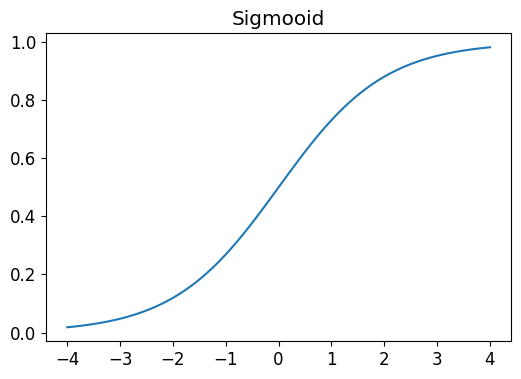

In [75]:
plot_function(torch.sigmoid, title='Sigmooid', min=-4, max=4)

In [76]:
def mnist_loss(predictions,targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions,predictions).mean()


In [77]:
weights = init_params((28*28,1))
bias = init_params(1)

In [78]:
dl = DataLoader(dset,batch_size=256)
valid_dl = DataLoader(valid_dset,batch_size=256)


In [79]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [80]:
preds = linear1(batch)
preds

tensor([[-15.0592],
        [ -6.4868],
        [-14.2646],
        [-11.4282]], grad_fn=<AddBackward0>)

In [81]:
loss = mnist_loss(preds,train_y[:4])
loss

tensor(0.9996, grad_fn=<MeanBackward0>)

In [82]:
loss.backward()

In [83]:
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-5.4572e-05), tensor([-0.0004]))

In [84]:
def calc_grad(xb,yb,model):
  preds = model(xb)
  loss = mnist_loss(preds,yb)
  loss.backward()

In [85]:
calc_grad(batch,train_y[:4],linear1)

In [86]:
weights.grad.shape, weights.grad.mean(), bias.grad


(torch.Size([784, 1]), tensor(-0.0001), tensor([-0.0008]))

In [87]:
calc_grad(batch,train_y[:4],linear1)
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0002), tensor([-0.0011]))

In [88]:
weights.grad.zero_()
bias.grad.zero_();

In [89]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [90]:
def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  correct = (preds>0.5)==yb
  return correct.float().mean()

In [91]:
batch_accuracy(linear1(batch),train_y[:4])

tensor(0.)

In [92]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)

validate_epoch(linear1)

0.4772

In [93]:
lr=1.
params = weights,bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.66

In [94]:
for i in range(20):
  train_epoch(linear1,lr,params)
  print(validate_epoch(linear1), end=' ')

0.8587 0.9198 0.9388 0.9495 0.9573 0.9617 0.9657 0.9666 0.9681 0.9696 0.9701 0.9706 0.9716 0.972 0.9715 0.9715 0.972 0.972 0.972 0.9725 

In [95]:
linear_model = nn.Linear(28*28,1)

In [96]:
class BasicOptim:
  def __init__(self, params,lr): self.params,self.lr=list(params),lr

  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [97]:
opt = BasicOptim(linear_model.parameters(), lr)

In [98]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()


In [99]:
validate_epoch(linear_model)

0.5355

In [100]:
def train_model(model,epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [101]:
train_model(linear_model,20)

0.4932 0.7041 0.8608 0.918 0.9365 0.9497 0.9575 0.9638 0.9658 0.9677 0.9697 0.9721 0.9746 0.9751 0.976 0.977 0.9775 0.978 0.978 0.979 

In [102]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model,20)

0.4932 0.8232 0.8457 0.9116 0.9346 0.9472 0.956 0.9629 0.9663 0.9677 0.9692 0.9712 0.9736 0.9751 0.976 0.977 0.9775 0.978 0.9785 0.9785 

In [103]:
dls = DataLoaders(dl,valid_dl)

In [104]:
learn = Learner(dls, nn.Linear(28*28,1),opt_func=SGD,loss_func=mnist_loss, metrics=batch_accuracy)

In [105]:
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636975,0.503282,0.495584,00:00
1,0.456669,0.226874,0.799313,00:00
2,0.170127,0.167773,0.848871,00:00
3,0.075970,0.102127,0.915604,00:00
4,0.041200,0.075564,0.934740,00:00
5,0.027552,0.060998,0.948479,00:00
6,0.021906,0.051840,0.955839,00:00
7,0.019373,0.045708,0.961727,00:00
8,0.018074,0.041382,0.965653,00:00
9,0.017285,0.038191,0.967615,00:00


In [106]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

In [107]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [111]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [112]:
learn = Learner(dls,simple_net,opt_func=SGD, loss_func=mnist_loss,metrics = batch_accuracy)

In [113]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.307176,0.410721,0.506379,00:00
1,0.142939,0.230399,0.801276,00:00
2,0.079422,0.115897,0.913641,00:00
3,0.052391,0.078262,0.941119,00:00
4,0.039835,0.061149,0.956330,00:00
5,0.033405,0.051550,0.963199,00:00
6,0.029705,0.045500,0.964671,00:00
7,0.027297,0.041368,0.966634,00:00
8,0.025562,0.038362,0.969087,00:00
9,0.024216,0.036063,0.969087,00:00


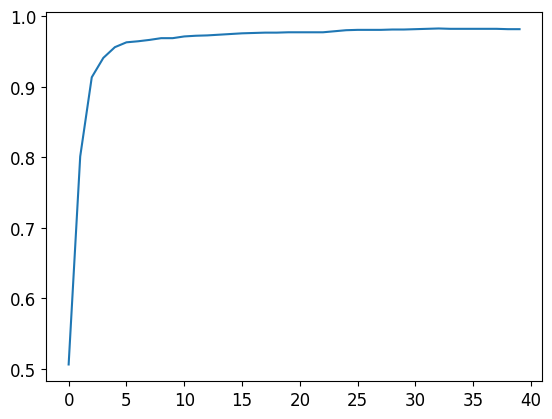

In [114]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [115]:
learn.recorder.values[-1][2]

0.981844961643219